In [1]:
import numpy as np
import json
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
embeddings = np.load("../../data/processed/embeddings.npy")
with open("../../data/processed/filenames.json", 'r') as f:
    filenames = json.load(f)

print(f"Number of documents = {len(embeddings)}")
print(f"Embedding dimension = {embeddings.shape[1]}")

Number of documents = 64
Embedding dimension = 384


In [3]:
k_range = range(2, 30)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embeddings, labels))
    print(f"k={k} -> silhouette={silhouette_scores[-1]:.3f}")

k=2 -> silhouette=0.115
k=3 -> silhouette=0.077
k=4 -> silhouette=0.091
k=5 -> silhouette=0.104
k=6 -> silhouette=0.113
k=7 -> silhouette=0.158
k=8 -> silhouette=0.158
k=9 -> silhouette=0.177
k=10 -> silhouette=0.205
k=11 -> silhouette=0.235
k=12 -> silhouette=0.218
k=13 -> silhouette=0.235
k=14 -> silhouette=0.232
k=15 -> silhouette=0.285
k=16 -> silhouette=0.265
k=17 -> silhouette=0.273
k=18 -> silhouette=0.261
k=19 -> silhouette=0.265
k=20 -> silhouette=0.282
k=21 -> silhouette=0.292
k=22 -> silhouette=0.295
k=23 -> silhouette=0.288
k=24 -> silhouette=0.301
k=25 -> silhouette=0.305
k=26 -> silhouette=0.304
k=27 -> silhouette=0.317
k=28 -> silhouette=0.305
k=29 -> silhouette=0.299


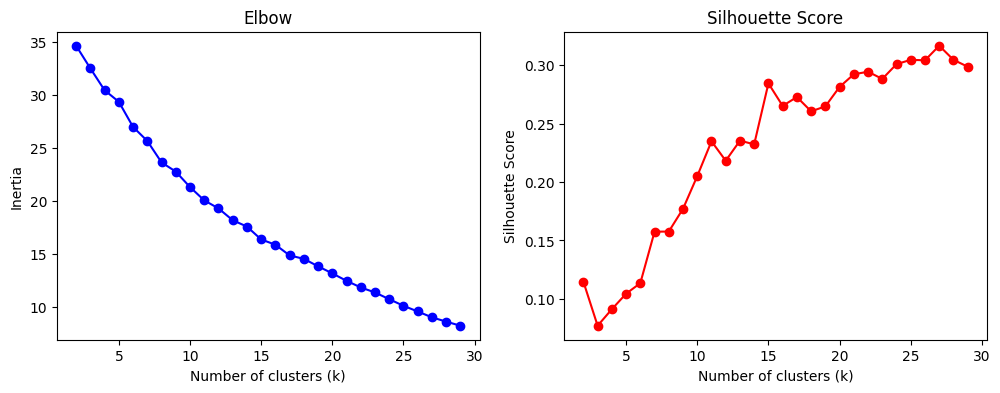

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow')

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score')

plt.show()

In [5]:
n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(embeddings)

print(f"Clustered into {n_clusters} groups")

Clustered into 10 groups


In [6]:
clusters = {}
for filename, label in zip(filenames, labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(filename)

print("\nCluster sizes:")
for label in sorted(clusters.keys()):
    print(f"Cluster {label}: {len(clusters[label])} documents")


Cluster sizes:
Cluster 0: 7 documents
Cluster 1: 7 documents
Cluster 2: 3 documents
Cluster 3: 13 documents
Cluster 4: 7 documents
Cluster 5: 2 documents
Cluster 6: 3 documents
Cluster 7: 9 documents
Cluster 8: 8 documents
Cluster 9: 5 documents


In [7]:
output_path = Path("../../results")
output_path.mkdir(parents=True, exist_ok=True)

results = [
    {'filename': fname, 'cluster': int(label)}
    for fname, label in zip(filenames, labels)
]

with open(output_path / "cluster_assignments.json", 'w') as f:
    json.dump(results, f, indent=2)

clusters_grouped = {int(k): v for k, v in clusters.items()}
with open(output_path / "clusters_grouped.json", 'w') as f:
    json.dump(clusters_grouped, f, indent=2)

print(f"Saved results to {output_path}")

Saved results to ../../results
